<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.08%20-%20Network%20Architectures%20-%20Multimodal%20information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.



In [60]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [61]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.16.1'

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image
%matplotlib inline

In [63]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


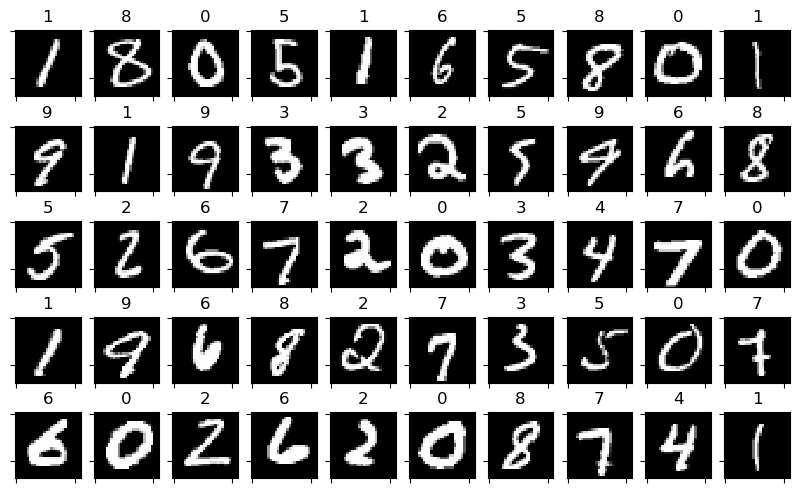

In [64]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# A regular neural network for classification

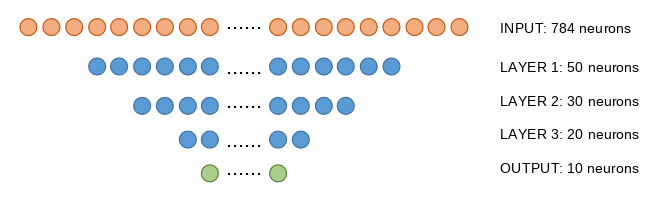

In [65]:
Image(filename='local/imgs/ann1.png')

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [66]:
yoh = np.eye(10)[y]

In [67]:
i = np.random.randint(len(y))
y[i], yoh[i]

(8, array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### **Creamos el modelo**

In [69]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [70]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

In [71]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610


/home/proci/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,610 (162.54 KB)

 Trainable params: 41,610 (162.54 KB)

 Non-trainable params: 0 (0.00 B)

### fit and display losses

In [72]:
model.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

Epoch 1/200


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.3140 - val_loss: 2.2067
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1267 - val_loss: 2.0677
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9558 - val_loss: 1.8941
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7157 - val_loss: 1.7315
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5025 - val_loss: 1.5766
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2293 - val_loss: 1.4246
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0850 - val_loss: 1.2689
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8882 - val_loss: 1.1367
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6786 - val_loss: 1.0146
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5626 - val_loss: 0.9211
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4157 - val_loss: 0.8726
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.32

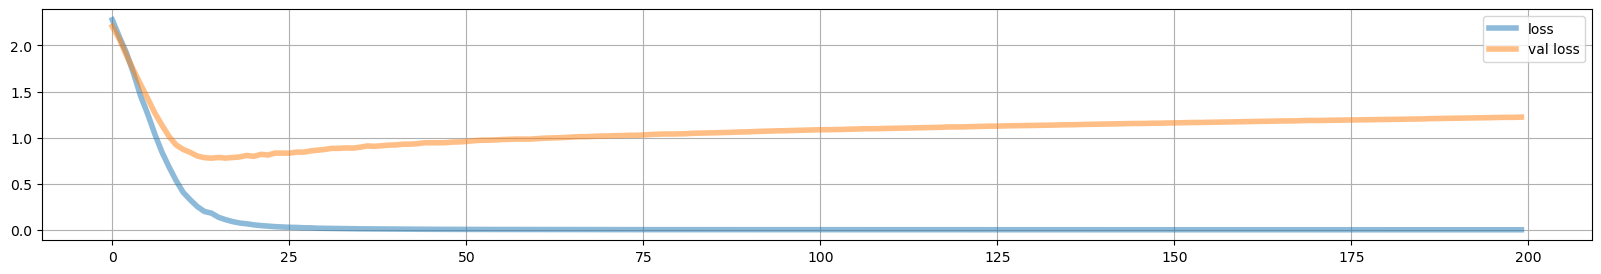

In [73]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [74]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy train 1.000
accuracy test  0.803


# Multimodal network

Simularemos que tenemos información sobre nuestros datos de una fuente adicional. Este puede ser el caso cuando tenemos, por ejemplo, imágenes médicas y datos clínicos asociados. En esta situación tenemos **datos multimodales** (imágenes y numéricos).

Nos gustaría tener una arquitectura en la que podamos inyectar tanto imágenes como datos numéricos.

En este caso, asumimos que tenemos una fuente de información adicional, que nos dice con un vector de tamaño 2 si cada imagen contiene un número par o impar (con valores `[1 0]` o `[0 1]`)

Esta nueva información **se inyecta en la CAPA 3** simplemente concatenando las neuronas

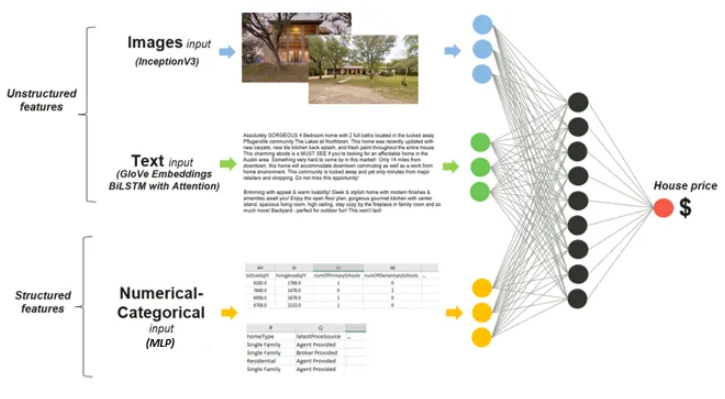

In [75]:
Image(filename = 'local/imgs/multimodal.png')

El aprendizaje multimodal intenta modelar la combinación de diferentes modalidades de datos, lo que a menudo surge en aplicaciones del mundo real. Un ejemplo de datos conjuntos es la combinación de texto (normalmente representado como vectores discretos de recuento de palabras) con datos de imágenes que consisten en intensidades de píxeles y etiquetas de anotación. Como estas modalidades tienen propiedades estadísticas fundamentalmente diferentes, combinarlas no es trivial, razón por la cual se requieren estrategias y algoritmos de modelado especializados.

¿Podemos entrenar simultáneamente datos estructurados (tabulares) y no estructurados (texto, imagen) en el mismo modelo de red neuronal mientras optimizamos el mismo objetivo de salida?

Realizaremos este experimento usando un ejemplo muy simple implementando un método de combinación "concat" que concatenará características de texto, características tabulares y características de imagen, todas a la vez antes de nuestra(s) capa(s) de regresor final.

Específicamente, construiremos una red neuronal multimodal que contiene 3 cabezales de entrada:

Imagen: Capas de entrada de Inception V3 (Transferir aprendizaje de Imagenet)
Texto: LSTM bidireccional con capas de atención previamente entrenadas en incrustaciones de GlOve
Estructurado: perceptrón multicapa

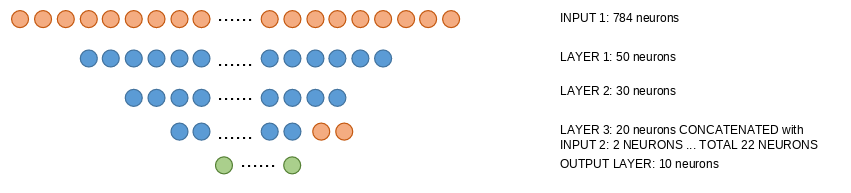

In [76]:
Image(filename='local/imgs/ann2.png')

Numbero de conecciones:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observar cómo se construye esta nueva arquitectura y cómo se manejan los dos tipos de información tanto al construir la red como al ajustar o predecir

In [77]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,))
    l11 = Dense(s1, activation="relu")(inp1)
    l12 = Dense(s2, activation="relu")(l11)
    l13 = Dense(s3, activation=s3_activation)(l12)
    
    inp2 = Input(shape=(extra_info_dim,))
    cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax')(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

Simulamos información adicional, de hecho podríamos tener varias opciones para codificar esta información, por ejemplo

- `[ 1, 0] [ 0, 1]` o
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` entre otras

Observa cómo **k0**, **k1** controlan cómo se representan los datos. Intentar:

- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

comprender cómo esta codificación afecta la representación

In [78]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [79]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │     39,250 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │      1,530 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 20)        │        620 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 22)        │          0 │ dense_2[0][0],    │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        230 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 41,630 (162.62 KB)

 Trainable params: 41,630 (162.62 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Epoch 1/200


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.3603 - val_loss: 2.2046
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0344 - val_loss: 1.9887
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7837 - val_loss: 1.7495
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5294 - val_loss: 1.5577
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3215 - val_loss: 1.4077
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1546 - val_loss: 1.2950
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9430 - val_loss: 1.1915
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8674 - val_loss: 1.1235
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7195 - val_loss: 1.0611
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6657 - val_loss: 1.0112
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5648 - val_loss: 0.9779
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5

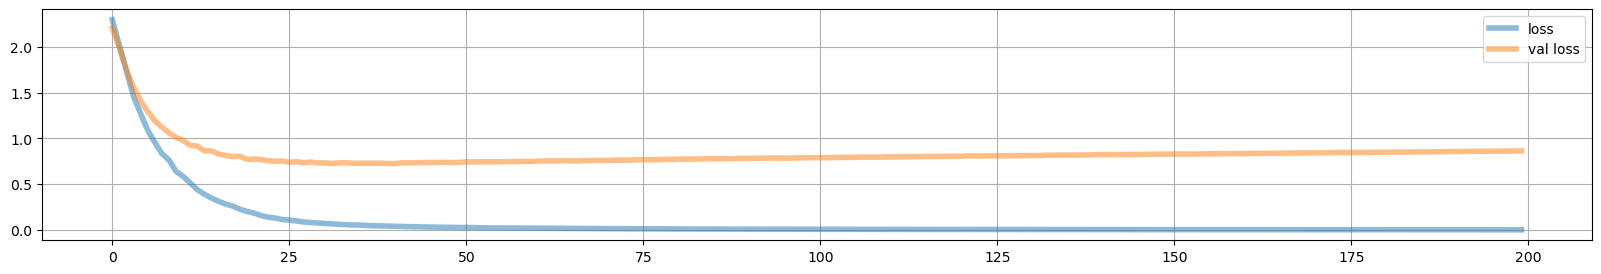

In [81]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [82]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy train 1.000
accuracy test  0.801


### **Ejemplo**

El mercado inmobiliario de Austin es uno de los mercados más populares en 2021 y estos listados muestran cómo ese mercado ha cambiado en los últimos años”.

[Dataset](https://www.kaggle.com/datasets/ericpierce/austinhousingprices?resource=download)

Este conjunto de datos incluye un conjunto de características (relativamente) limpio. El conjunto de datos original sin limpiar constaba de más de 700 columnas y se puede descargar si selecciona "versión 1" en lugar de la última versión.

También incluí la primera imagen de cada listado de casas en Zillow. Utilicé estos datos para predecir el precio de la vivienda utilizando imágenes además de las características del archivo de datos.

### **Ingeniería de datos tabulares**

Aunque se dice que los datos se han limpiado, todavía quedan muchos problemas de calidad de los datos. Por ejemplo, hay valores de características imposibles, como casas con 0 baños o 0 dormitorios o pies cuadrados negativos de área habitable.

A continuación se muestra una tabla que resume algunas de las principales transformaciones de datos y pasos de limpieza realizados:

In [83]:
df = pd.read_csv('local/data/austinHousingData.csv')
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [84]:
df.rename(columns={'latestPrice':'price'}, inplace=True)

In [85]:
df['latest_saleyear'].unique()

array([2019, 2020, 2018, 2021])

In [86]:
df['latest_saledate'].min()

'2018-01-22'

In [87]:
df['latest_saledate'].max()

'2021-01-30'

Necesitamos buscar algunas fuentes externas para obtener información sobre la apreciación del precio de la vivienda. Existe un sitio de la Junta de Agentes Inmobiliarios de Austin para obtener esta información de Texas A&M para el área metropolitana de Austin que cubren estos datos.
https://www.recenter.tamu.edu/data/housing-activity/#!/activity/MSA/Austin-Round_Rock

Mediana de enero de 2018: 287000
Mediana de enero de 2019: 294 000 +2,4 %
Mediana de enero de 2020: 305.000 +3,7 %
Mediana de enero de 2021: 363830 +19,3% (!!!)

In [88]:
jan2018_to_2019 = .024/12
jan2019_to_2020 = .037/12
jan2020_to_2021 = .193/12

# create reverse time series number for month
for i in range(1,13):
    df['time_series'] = df['latest_salemonth'].apply(lambda x: abs(x-13))

# adjust 2018 to 2019
df.loc[df['latest_saleyear']==2018, 'adj_price'] = df.loc[df['latest_saleyear']==2018].apply(lambda x: int( (x['price'])*(1+(jan2018_to_2019*x['time_series']))*(1+(jan2019_to_2020*x['time_series']))*(1+(jan2020_to_2021*x['time_series'])) ) , axis=1 )

# adjust 2019 to 2020                                                            
df.loc[df['latest_saleyear']==2019, 'adj_price'] = df.loc[df['latest_saleyear']==2019].apply(lambda x: int( (x['price'])*(1+(jan2019_to_2020*x['time_series']))*(1+(jan2020_to_2021*x['time_series'])) ) , axis=1)
                                                                                  
# adjust 2020 to 2021
df.loc[df['latest_saleyear']==2020, 'adj_price'] = df.loc[df['latest_saleyear']==2020].apply(lambda x: int( (x['price'])*(1+(jan2020_to_2021*x['time_series'])) ), axis=1)

#copy 2021 to self
df.loc[df['latest_saleyear']==2021, 'adj_price'] = df.loc[df['latest_saleyear']==2021].apply(lambda x: int(x['price']), axis=1)

# rename original price column and make adj_price our price column
df.rename(columns={'price' : 'orig_price', 'adj_price' : 'price'}, inplace=True)

# put price at the front of the data frame
df.set_index('price', inplace=True)
df.reset_index(inplace=True)

In [89]:
df['homeType'].value_counts(normalize=True)

homeType
Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Residential              0.002439
Apartment                0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: proportion, dtype: float64

In [90]:
df = df.loc[((df['homeType'] == 'Single Family') | (df['homeType'] == 'Condo')) | (df['homeType'] == 'Townhouse')]

In [91]:
df[df.duplicated(subset=['latitude','longitude'], keep=False)].sort_values('latitude')


,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series


/home/proci/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/proci/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/proci/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


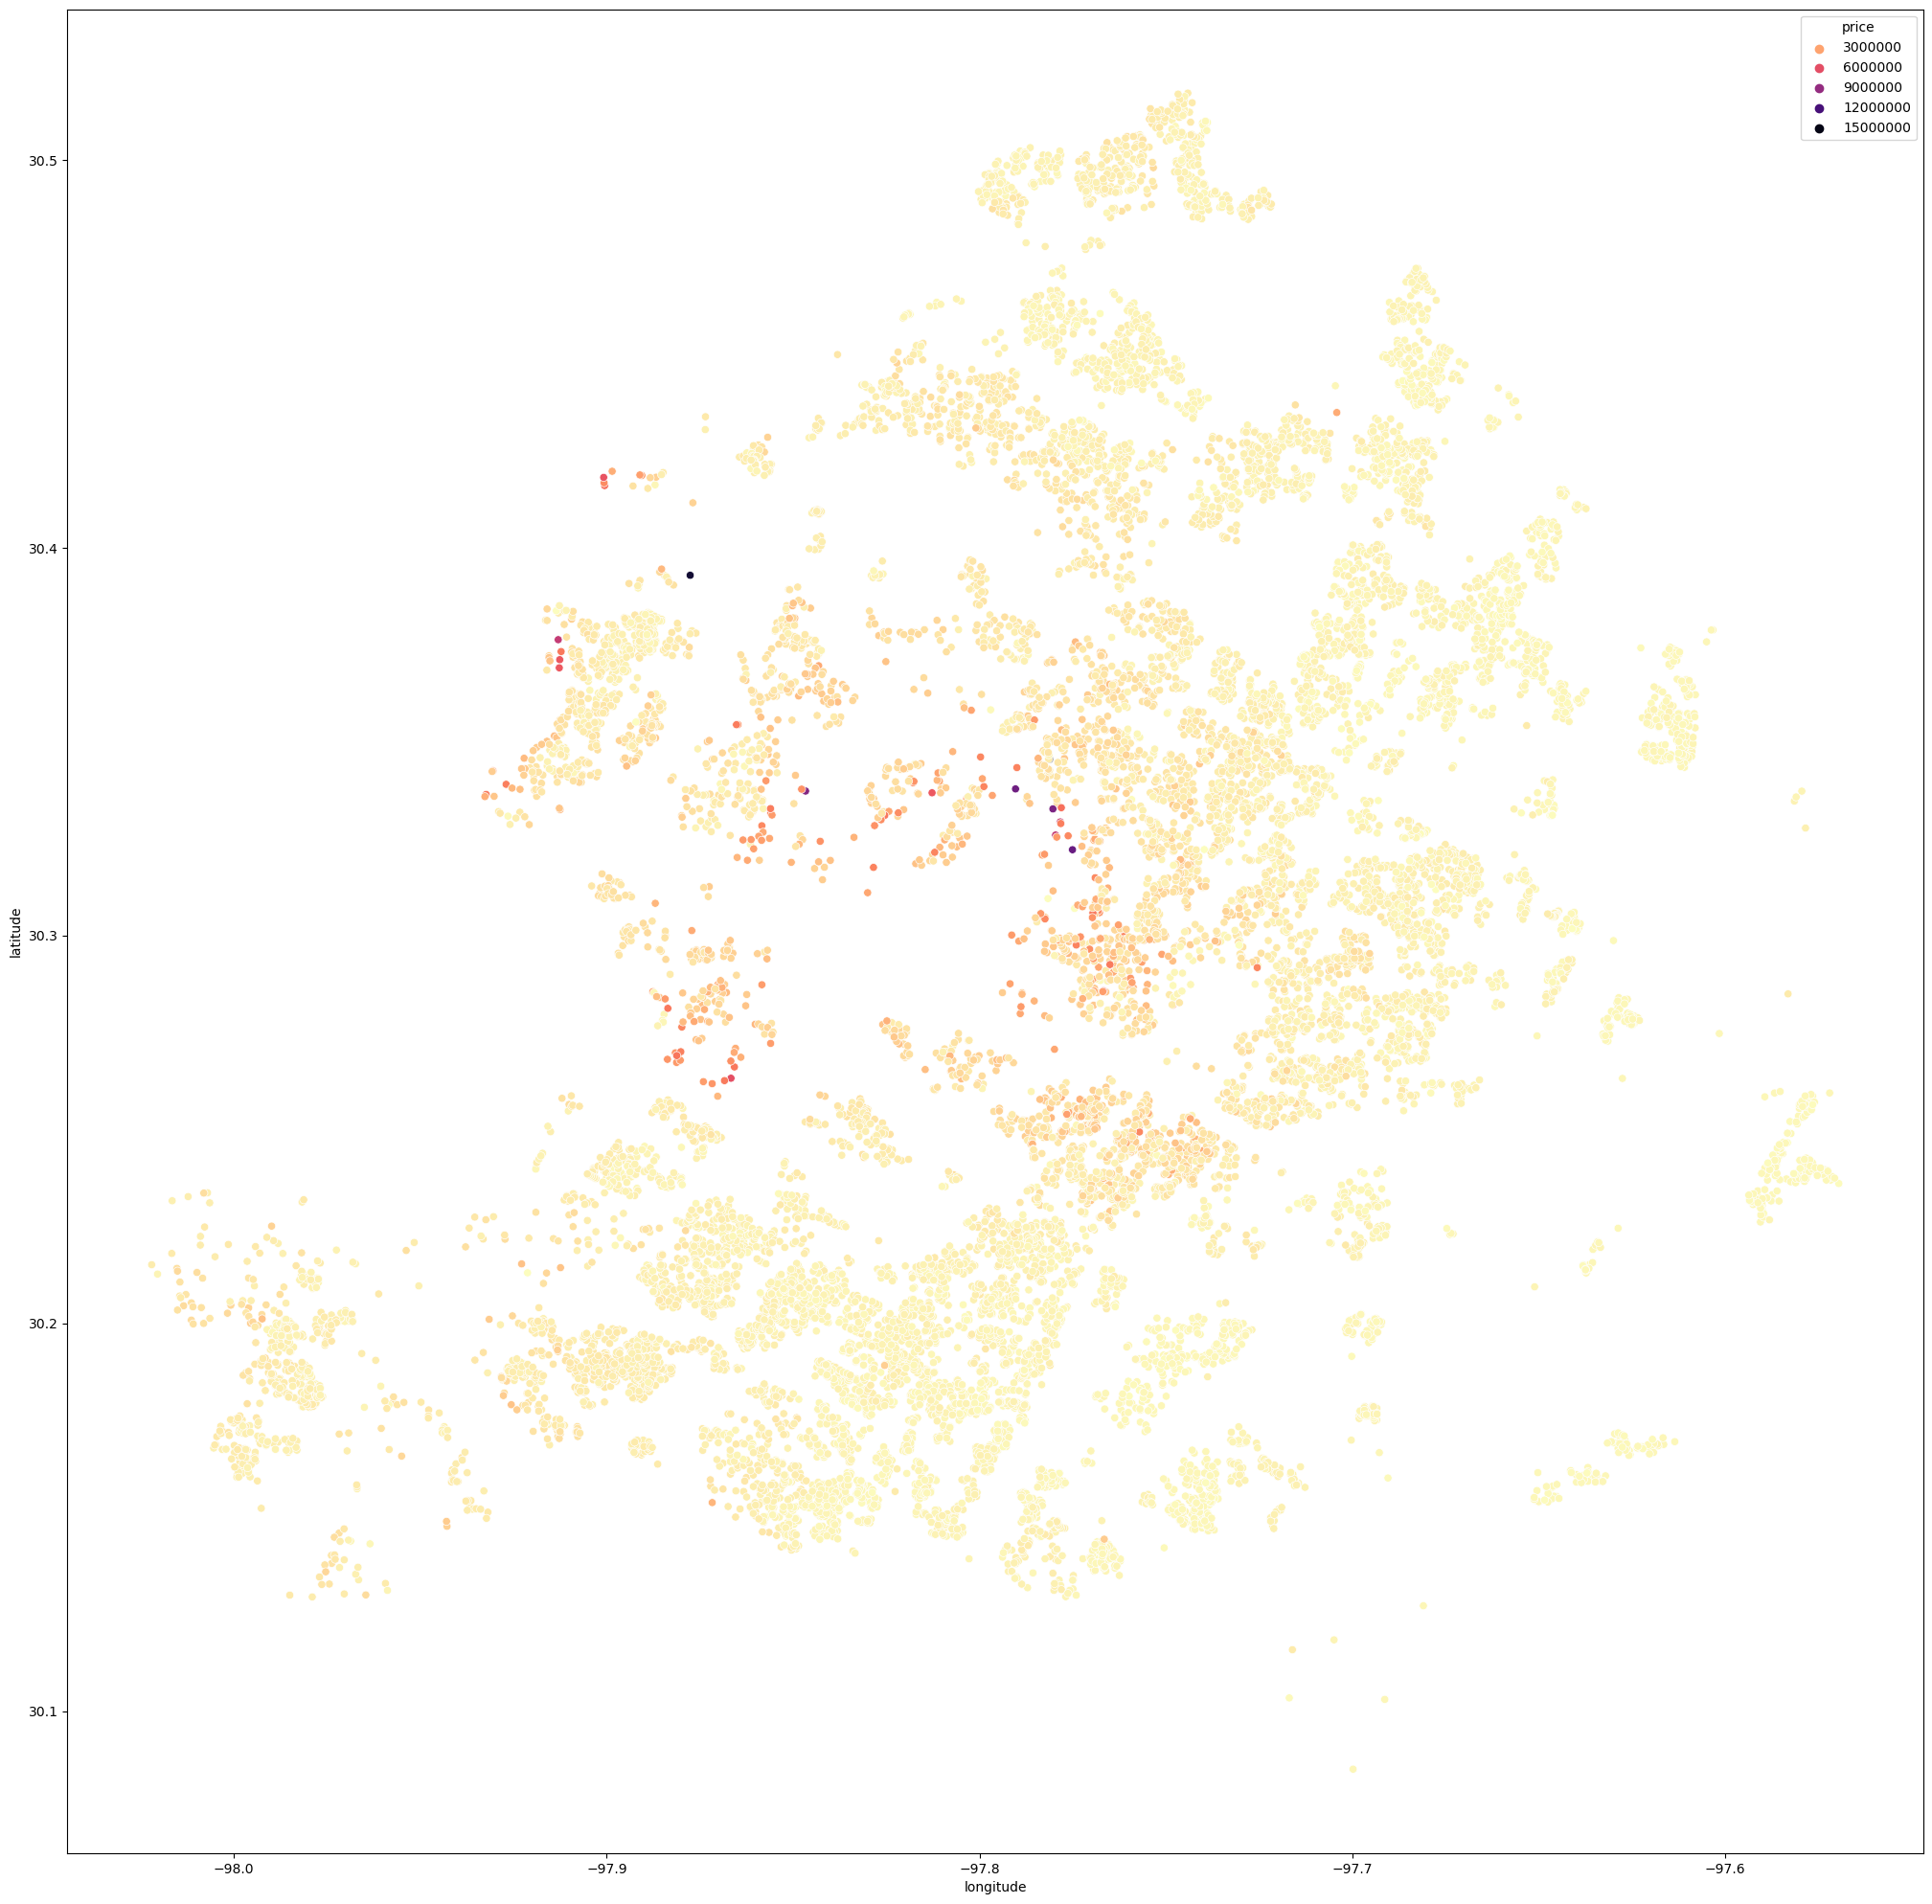

In [94]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="longitude", y="latitude", hue="price", palette="magma_r");

Usando la latitud y la longitud, creamos un mapa visual del área de Austin que nos permite ver los valores atípicos del mapa. No parece haber zonas que estén fuera del área de Austin, excepto unas pocas en el área inferior del SE. Así que podríamos planear cortar nuestra latitud justo por encima de 30,1.

Esta visualización sugiere que la ubicación es muy importante para el precio de la vivienda. Lo comprobaremos más directamente.

In [95]:
df.drop(df[df['latitude']<30.12].index , inplace=True)


In [96]:
df.describe()

,price,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,orig_price,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,time_series
count,1.488000e+04,1.488000e+04,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,1.488000e+04,...,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000
mean,5.710926e+05,1.043332e+08,78736.001075,30.291923,-97.778870,1.994194,1.228159,1.227554,1988.720228,5.119011e+05,...,1.034946,0.977621,1.838871,5.792622,1240.125134,14.868952,2.696704,3.441599,1.469422,6.277957
std,4.933980e+05,3.171262e+08,18.879984,0.097245,0.084904,0.053290,1.342097,1.342224,21.504783,4.413982e+05,...,0.260259,0.292564,1.065639,1.859791,325.654819,1.743026,1.025875,0.811953,0.523915,3.137916
min,6.094000e+03,2.858495e+07,78617.000000,30.127161,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,...,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000,1.000000
25%,3.445055e+05,2.941134e+07,78727.000000,30.202993,-97.838747,1.980000,0.000000,0.000000,1975.000000,3.090000e+05,...,1.000000,1.000000,1.100000,4.000000,983.000000,14.000000,2.000000,3.000000,1.000000,4.000000
50%,4.538920e+05,2.949518e+07,78739.000000,30.285250,-97.769810,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,...,1.000000,1.000000,1.566667,6.000000,1298.000000,15.000000,3.000000,3.000000,1.000000,6.000000
75%,6.370388e+05,7.033871e+07,78749.000000,30.367340,-97.718283,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,...,1.000000,1.000000,2.266667,7.000000,1498.500000,16.000000,3.000000,4.000000,2.000000,9.000000
max,1.555613e+07,2.146313e+09,78759.000000,30.517174,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,...,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000,12.000000


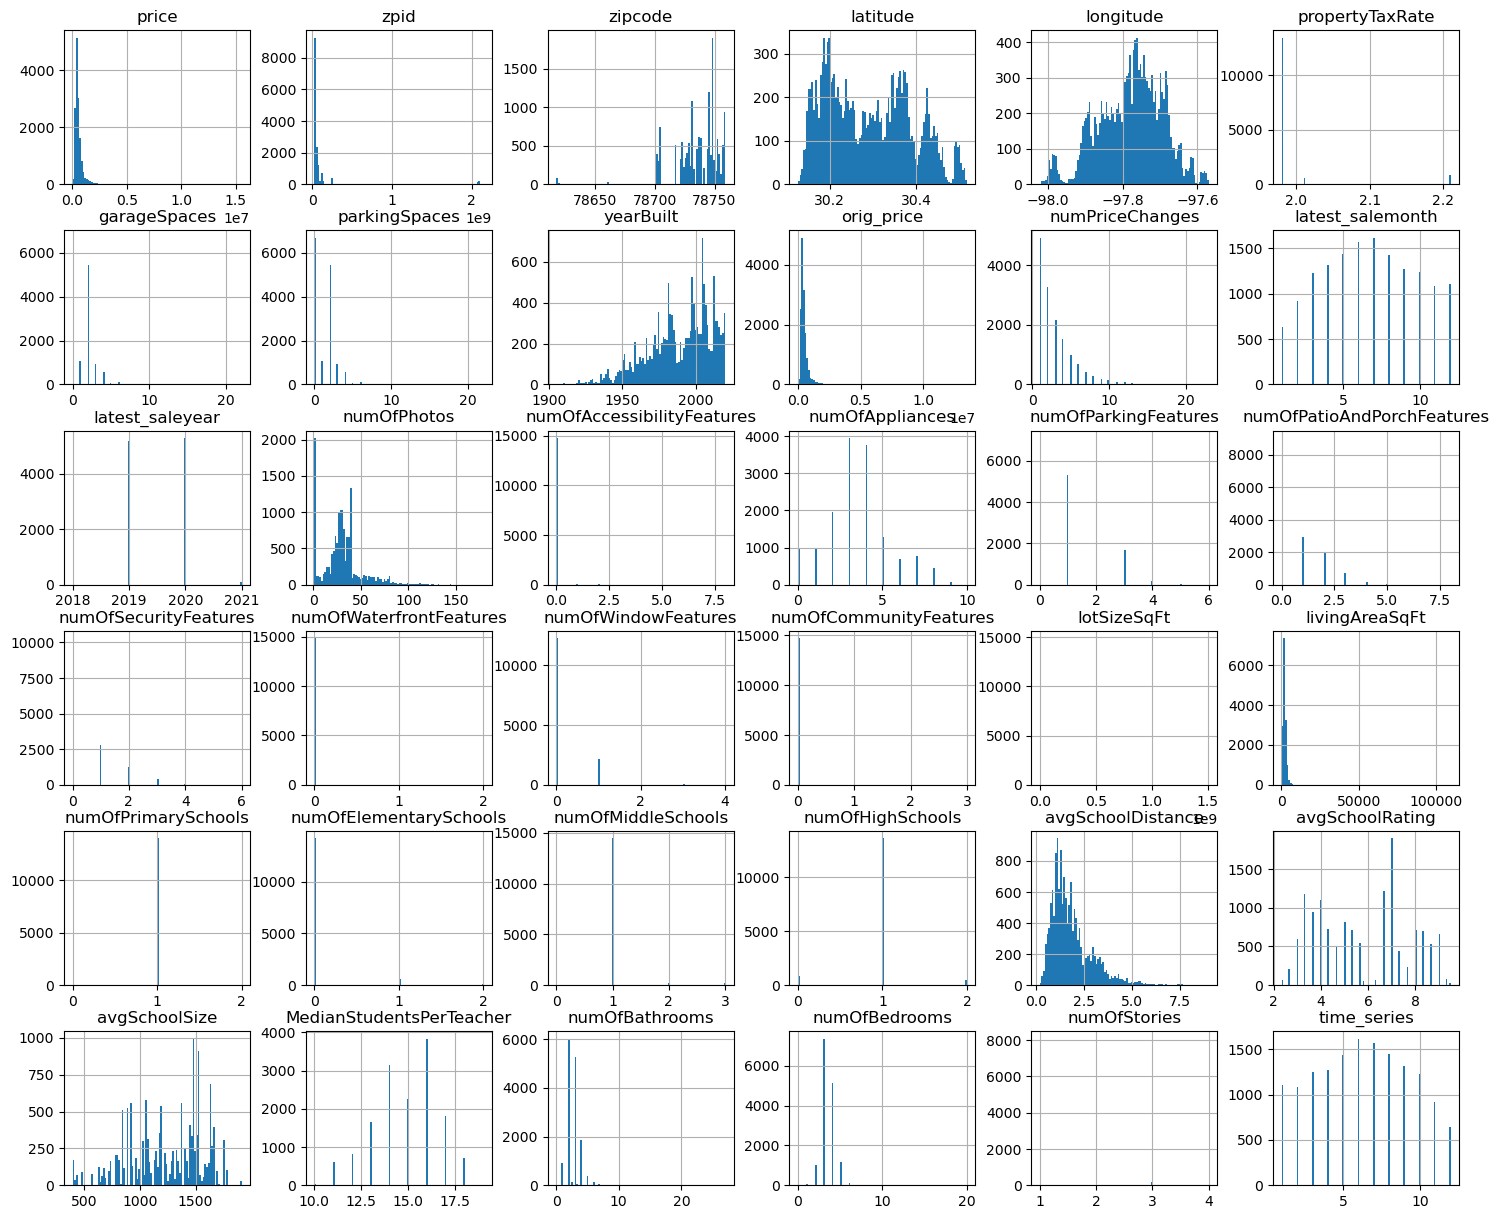

In [97]:
# check how our histograms are looking
df.hist(figsize=(18,15), bins=100);

In [98]:
df.sort_values('lotSizeSqFt', ascending=False).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
14654,1941912.0,58297775,austin,3200 W 35th St,78703,Fabulous 4 Bed 4 Bath house on one of the larg...,30.314316,-97.768044,1.98,5,...,1,1.633333,7.000000,1298,16,4.0,4,2,58297775_ea7a00b4cbb5788f252f04fce1c9e84a-p_f.jpg,11
9244,190324.0,62605548,austin,706 W 22nd St APT 306,78705,Leased for $1695 though 7/31/2020 - Unique gat...,30.285631,-97.745697,1.98,0,...,1,1.533333,6.000000,1196,16,1.0,2,1,62605548_0b3873e5b78f01227ad3a038c06a6f13-p_f.jpg,3
11116,208577.0,145652991,austin,4319 Nitschke St,78723,**Subject to City of Austin SMART Housing and ...,30.294910,-97.698997,1.98,1,...,1,2.166667,5.000000,966,15,2.0,2,2,145652991_0b5dacd57ed4126cdfdd8d563bb0c043-p_f...,7
2340,680880.0,124837778,austin,4304 Front Range Ln,78732,"4304 Front Range Ln, Austin, TX 78732 is a sin...",30.380476,-97.881027,1.98,2,...,1,1.833333,8.333333,1476,17,3.0,4,2,124837778_99ba1046c98f724f8866c5cdc5afe169-p_f...,10
4635,1038012.0,202157510,austin,201 Charismatic Pl,78737,"201 Charismatic Pl, Austin, TX 78737 is a sing...",30.205276,-98.011406,2.01,3,...,1,5.533333,6.666667,1132,16,6.0,5,2,202157510_b30ae95a57301eb1d73cb91350beef3a-p_f...,2


In [99]:
df.sort_values('livingAreaSqFt', ascending=True).head(5)


,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
1170,960658.0,94641643,austin,3003 Brass Buttons Trl,78734,Lake Austin Waterfront lot in Apache Shores! O...,30.381195,-97.915985,1.98,0,...,1,2.633333,7.000000,1715,16,2.0,2,1,94641643_9764275995e6a1d64eb9ee3383342db7-p_f.jpg,6
3518,155233.0,29420819,austin,404 Primrose St,78753,"404 Primrose St, Austin, TX 78753 is a single ...",30.350330,-97.697739,1.98,0,...,1,0.933333,2.666667,932,14,1.0,1,1,29420819_eacd95953733cf1630001311c5c3d8dd-p_f.jpg,6
13314,185140.0,29330022,austin,1405 Hartford Rd APT 202,78703,Old West Austin Efficiency. Close to metro/UT ...,30.284014,-97.762421,1.98,0,...,1,0.600000,6.000000,1189,16,1.0,0,1,29330022_325baca18f3fe6664c210987fd58ed8a-p_f.jpg,3
10118,527915.0,29385318,austin,2202 E 10th St,78702,Great opportunity to build on your lot in high...,30.264668,-97.717590,1.98,2,...,1,1.033333,5.000000,697,11,1.0,1,2,29385318_8cb1b5c135c1df01c788a481e928d68c-p_f.jpg,3
9213,164541.0,145658912,austin,1011 W 23rd St APT 103,78705,Very desirable location for UT students only 5...,30.287077,-97.748085,1.98,1,...,1,1.400000,6.000000,1196,16,1.0,1,1,145658912_71f342a92115aa75aac958c41f6e7543-p_f...,4


In [100]:
#check what is going on with the livingAreaSqFt outliers by sorting descending
df.sort_values('livingAreaSqFt', ascending=False).head(5)


,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
705,401434.0,70330356,austin,201 Marly Way,78733,Level building site with great canyon views an...,30.323517,-97.861473,1.98,0,...,0,3.233333,8.000000,1373,14,0.0,5,2,70330356_streetviewsize1025x768location30.3235...,2
2557,1011842.0,64523076,austin,9704 Saugus Ln,78733,"New Construction, EANES Schools, 4bed 3 bath, ...",30.345898,-97.859985,1.98,0,...,0,4.300000,8.000000,1373,14,0.0,1,2,64523076_streetviewlocation9704SaugusLn2CAusti...,10
2316,14076258.0,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,...,1,2.200000,8.333333,1476,17,13.0,6,1,125904370_a200adec53a31c17278601026747d1ae-p_f...,2
5328,3172530.0,29327226,austin,3509 Lost Creek Blvd,78735,"*$6,762,377 is Tax Value - Set in exclusive Ba...",30.272158,-97.856033,1.98,7,...,1,4.300000,5.666667,1332,16,10.0,6,3,29327226_811cfb134911b60830174fb4700afc39-p_f.jpg,8
375,5484816.0,89551873,austin,14800 Flat Top Ranch Rd,78732,GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...,30.368996,-97.912720,1.98,6,...,1,2.733333,8.333333,1476,17,10.0,5,2,89551873_acca4b6361693761e8631145233ffd75-p_f.jpg,5


In [101]:
# we're dropping the top two listings here. One is a lot, and the other is clearly mistaken.
df.drop(index=[705, 2557], inplace=True)

In [102]:
#check what is going on with the numOfBathrooms outliers by sorting descending
df.sort_values('numOfBathrooms', ascending=False).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
2838,780946.0,111972888,austin,4212 Far West Blvd,78731,Well-maintained home in highly desirable North...,30.361406,-97.769707,1.98,2,...,1,0.933333,7.000000,1483,16,27.0,4,1,111972888_a88e572d95e496b1b5d9a591800497c4-p_f...,3
2316,14076258.0,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,...,1,2.200000,8.333333,1476,17,13.0,6,1,125904370_a200adec53a31c17278601026747d1ae-p_f...,2
184,4165941.0,124843021,austin,13115 Perryton Dr,78732,This highly custom home sits on a well-establi...,30.338959,-97.926979,1.98,4,...,1,3.433333,8.333333,1533,17,10.0,6,2,124843021_38aeda802d6cf001f7befec5a053d009-p_f...,1
5328,3172530.0,29327226,austin,3509 Lost Creek Blvd,78735,"*$6,762,377 is Tax Value - Set in exclusive Ba...",30.272158,-97.856033,1.98,7,...,1,4.300000,5.666667,1332,16,10.0,6,3,29327226_811cfb134911b60830174fb4700afc39-p_f.jpg,8
375,5484816.0,89551873,austin,14800 Flat Top Ranch Rd,78732,GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...,30.368996,-97.912720,1.98,6,...,1,2.733333,8.333333,1476,17,10.0,5,2,89551873_acca4b6361693761e8631145233ffd75-p_f.jpg,5


In [103]:
# I'm going to say this top listing has 2.5 bathrooms not 27. That is clearly a typo.
df.loc[df.index==2838, 'numOfBathrooms'] = 2.5

In [104]:
#check what is going on with the numOfBathrooms outliers by sorting ascending
df.sort_values('numOfBathrooms', ascending=True).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
6252,1010014.0,29327134,austin,2005 Real Catorce,78746,"2005 Real Catorce, Austin, TX 78746 is a singl...",30.269354,-97.818771,1.98,0,...,0,0.600000,9.500000,1630,14,0.0,5,2,29327134_streetviewsize1025x768location30.2693...,3
6646,493682.0,29503854,austin,8604 Oak Ledge Dr,78748,"8604 Oak Ledge Dr, Austin, TX 78748 is a singl...",30.188589,-97.823662,1.98,0,...,1,2.266667,5.666667,1537,16,0.0,0,1,29503854_streetviewlocation8604OakLedgeDr2CAus...,5
1842,995762.0,94642666,austin,10640 Senna Hills Dr,78733,Wow! Reduced! First time on the market! Move i...,30.312716,-97.900482,1.98,2,...,0,2.766667,9.333333,1360,14,0.0,0,2,94642666_5d6e752fd9e13c6e7241c68017dd5319-p_f.jpg,7
2223,959366.0,58299964,austin,5138 Mansfield View Ct,78732,"5138 Mansfield View Ct, Austin, TX 78732 is a ...",30.390335,-97.882072,1.98,2,...,1,2.100000,8.333333,1476,17,0.0,4,2,58299964_747f1d8b4915b675bca16aff4f6bcc2d-p_f.jpg,8
12993,472902.0,58315415,austin,4712 Chesney Ridge Dr,78749,"This Austin two-story offers a fireplace, an o...",30.197540,-97.862419,1.98,2,...,1,1.600000,7.333333,1576,16,0.0,5,2,58315415_streetviewlocation4712ChesneyRidgeDr2...,3


In [105]:
# most listings with 0 bathrooms also have 0 bedrooms. This is clearly wrong, but I'm not going to guess if there are no bedrooms.
# I will impute typical bathroom count per bedroom count based on year built
# then drop any remaining listings with 0 bathrooms and 0 bedrooms

df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 1
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2.5
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 2

df.drop(df[df['numOfBathrooms']==0].index, inplace=True)
df.drop(df[df['numOfBedrooms']==0].index, inplace=True)

In [106]:
#check what is going on with the numOfBedrooms outliers by sorting descending
df.sort_values('numOfBedrooms', ascending=False).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
8597,180525.0,2094498207,austin,4902 Duval Rd R2 #R2,78727,"Lovely convenient condo, with a private wooded...",30.415489,-97.737213,1.98,0,...,1,2.400000,6.000000,1474,15,2.0,20,1,2094498207_76320ecfd86161cc1d91c46c95c1afcf-p_...,2
8531,702270.0,58306332,austin,3906 Hawkshead Dr,78727,Enjoy this home across from The Domain! Comple...,30.416149,-97.722801,1.98,2,...,1,2.666667,6.666667,1486,15,4.0,8,2,58306332_c0963729ec7bd42164615c02d9825a50-p_f.jpg,5
14435,898270.0,29401385,austin,4302 Avenue G APT C,78751,Charming 3-unit multifamily property built by ...,30.305981,-97.728012,1.98,0,...,1,1.433333,7.333333,1142,15,4.0,7,2,29401385_19535e7778c048c5b703ef78b6b40c77-p_f.jpg,9
13910,3949387.0,29322655,austin,1608 S 2nd St,78704,Modern luxury by Joseph Design Build with prim...,30.249325,-97.757095,1.98,5,...,1,0.666667,5.000000,889,13,7.0,7,2,29322655_46672f649e50f848a746a7b0421c2ed2-p_f.jpg,9
9314,696494.0,29384319,austin,1310 E 2nd St,78702,"Contact owner for showing, day before advance ...",30.260422,-97.730194,1.98,2,...,1,1.100000,4.666667,992,14,7.0,7,2,29384319_8c7c32099fdfd1895eb36b68cbad62c9-p_f.jpg,10


In [107]:
# That condo is supposed to have 2 bathrooms, not 20.
df.loc[df.index==8597, 'numOfBedrooms'] = 2

In [108]:
#check what is going on with the garageSpaces outliers by sorting descending
df.sort_values('garageSpaces', ascending=False).head(10)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
6885,411834.0,145656156,austin,705 Mc Queen St #34,78745,Beautiful 2-story home located in highly sough...,30.189331,-97.792809,1.98,22,...,1,0.866667,3.333333,926,13,3.0,4,1,145656156_7eaa8fc35c2a80099dae663115c8e34a-p_f...,2
4533,1006838.0,28587235,austin,13100 Rooster Springs Rd,78737,Enjoy country living with the convenience of t...,30.204746,-97.991356,2.01,20,...,1,6.766667,6.666667,1132,16,5.0,4,1,28587235_5a6a7b48074e944ed02a280f06dfaa43-p_f.jpg,10
4777,1620652.0,29331364,austin,3301 Barton Creek Blvd,78735,Privately gated Barton Creek estate on 1.58 Ac...,30.283585,-97.875526,1.98,12,...,1,5.366667,5.666667,1332,16,5.0,4,2,29331364_70cdb457329d7f8822ea9907032f8716-p_f.jpg,1
9240,3892150.0,29396074,austin,908 Keith Ln,78705,Keith Lane is has our homes strategically plac...,30.291706,-97.725502,1.98,12,...,1,1.233333,7.333333,1142,15,3.0,6,2,29396074_b1521d52623a64343f61e3093ea83446-p_f.jpg,9
6805,575963.0,29502805,austin,7600 Elm Forest Rd,78745,Gorgeous 3/2 home owner remodel on almost 2/3 ...,30.190971,-97.800804,1.98,12,...,1,1.566667,3.333333,1409,14,2.0,3,1,29502805_59509f778dbf2a2d4ff966ffd89f01f6-p_f.jpg,5
6985,333275.0,29494837,austin,6907 Cherrydale Dr,78745,Beautifully remodeled home in HOT 78745!! This...,30.200857,-97.803902,1.98,12,...,1,1.233333,4.000000,840,13,1.0,3,1,29494837_df65b7181d2b1d4749672b8b95f365b0-p_f.jpg,1
11108,516083.0,29409917,austin,1405 Berkshire Dr,78723,Beautifully renovated single story mid-century...,30.317060,-97.697220,1.98,12,...,1,0.700000,3.000000,849,14,2.0,3,1,29409917_884d8f325332b7b38909b77751e3b189-p_f.jpg,2
14875,511468.0,29415933,austin,5804 Bullard Dr,78757,"5804 Bullard Dr, Austin, TX 78757 is a single ...",30.336634,-97.750031,1.98,10,...,1,0.800000,6.666667,1153,16,2.0,3,1,29415933_c80565e4044d0ae688fb802478bf44a3-p_f.jpg,7
6230,2009247.0,29327172,austin,1814 Randolph Ridge Trl,78746,"Stunning home in Eanes, minutes from downtow...",30.272011,-97.821548,1.98,10,...,0,0.550000,9.500000,1630,14,5.0,5,2,29327172_651d5bacae22a9c8f693720e0047ac3f-p_f.jpg,4
3459,533443.0,29423855,austin,8909 Georgian Dr,78753,Unique opportunity to own a large lot in an ar...,30.356129,-97.695686,1.98,10,...,1,0.900000,2.666667,932,14,3.0,3,1,29423855_b42f51776cdee12bc0e9506b4a7cb5c7-p_f.jpg,1


In [109]:
# a bunch of these garage spaces are definitely just bogus numbers. I'm going to force change a lot of them to numbers that make sense
df.loc[(df['garageSpaces'] > 3) & (df['price'] < 1000000) & (df['homeType'] == 'Single Family'), 'garageSpaces'] = 3
df.loc[(df['garageSpaces'] > 5) & (df['price'] > 1000000)& (df['homeType'] == 'Single Family'), 'garageSpaces'] = 4
df.loc[df.index==6885, 'garageSpaces'] = 2

In [110]:
#check what is going on with the parkingSpaces outliers by sorting descending
df.sort_values('parkingSpaces', ascending=False).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
6885,411834.0,145656156,austin,705 Mc Queen St #34,78745,Beautiful 2-story home located in highly sough...,30.189331,-97.792809,1.98,2,...,1,0.866667,3.333333,926,13,3.0,4,1,145656156_7eaa8fc35c2a80099dae663115c8e34a-p_f...,2
4533,1006838.0,28587235,austin,13100 Rooster Springs Rd,78737,Enjoy country living with the convenience of t...,30.204746,-97.991356,2.01,4,...,1,6.766667,6.666667,1132,16,5.0,4,1,28587235_5a6a7b48074e944ed02a280f06dfaa43-p_f.jpg,10
6985,333275.0,29494837,austin,6907 Cherrydale Dr,78745,Beautifully remodeled home in HOT 78745!! This...,30.200857,-97.803902,1.98,3,...,1,1.233333,4.000000,840,13,1.0,3,1,29494837_df65b7181d2b1d4749672b8b95f365b0-p_f.jpg,1
6805,575963.0,29502805,austin,7600 Elm Forest Rd,78745,Gorgeous 3/2 home owner remodel on almost 2/3 ...,30.190971,-97.800804,1.98,3,...,1,1.566667,3.333333,1409,14,2.0,3,1,29502805_59509f778dbf2a2d4ff966ffd89f01f6-p_f.jpg,5
11108,516083.0,29409917,austin,1405 Berkshire Dr,78723,Beautifully renovated single story mid-century...,30.317060,-97.697220,1.98,3,...,1,0.700000,3.000000,849,14,2.0,3,1,29409917_884d8f325332b7b38909b77751e3b189-p_f.jpg,2


In [111]:
# We are going to do the same forced conversions on parking spaces
df.loc[(df['parkingSpaces'] > 3) & (df['price'] < 1000000 & (df['homeType'] == 'Single Family')), 'parkingSpaces'] = 3
df.loc[(df['parkingSpaces'] > 5) & (df['price'] > 1000000& (df['homeType'] == 'Single Family')), 'parkingSpaces'] = 5
df.loc[df.index==6885, 'parkingSpaces'] = 2

df.sort_values('parkingSpaces', ascending=False).head(5)

,price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,time_series
6114,1233761.0,29326930,austin,1308 Brians Meadow Cv,78746,Award winning EANES ISD. Cedar Creek Elementar...,30.269625,-97.803162,1.98,4,...,0,0.500000,9.000000,1600,14,4.0,4,2,29326930_9506188a2c6051f61bcaea75903f604d-p_f.jpg,8
5605,472308.0,29361586,austin,12712 Mcnelly Trl,78732,Home is in immaculate condition with loads of ...,30.381527,-97.891388,1.98,3,...,1,2.000000,8.333333,1476,17,3.0,4,2,29361586_7c62fada59b1e7abb7beb9fecb77273b-p_f.jpg,10
7073,302792.0,29488557,austin,6507 Krollton Dr,78745,Beautiful one story home in Cherry Creek. Two...,30.208628,-97.810165,1.98,3,...,1,0.900000,4.000000,840,13,2.0,3,1,29488557_537a82c1e5f460520c56e5c3d95e423c-p_f.jpg,1
4987,293174.0,70332724,austin,10901 Strand St,78748,South Austin Gem! This beautifully updated 4 b...,30.167471,-97.843445,1.98,3,...,1,1.833333,5.000000,1450,15,2.0,4,1,70332724_4780625f504619e0b31f7edbe40495f4-p_f.jpg,8
3558,345824.0,29425216,austin,8519 Parkfield Dr,78758,Soak up the sunshine in this remodeled 3BR/4BA...,30.358917,-97.711327,1.98,3,...,1,0.533333,4.000000,1028,14,4.0,4,2,29425216_933115fdc6dd2d36480a59bf04a286fc-p_f.jpg,10


In [112]:
df['city'].value_counts()

city
austin              14718
del valle              85
pflugerville           36
driftwood              12
manor                   5
dripping springs        4
manchaca                3
west lake hills         2
road                    1
Name: count, dtype: int64

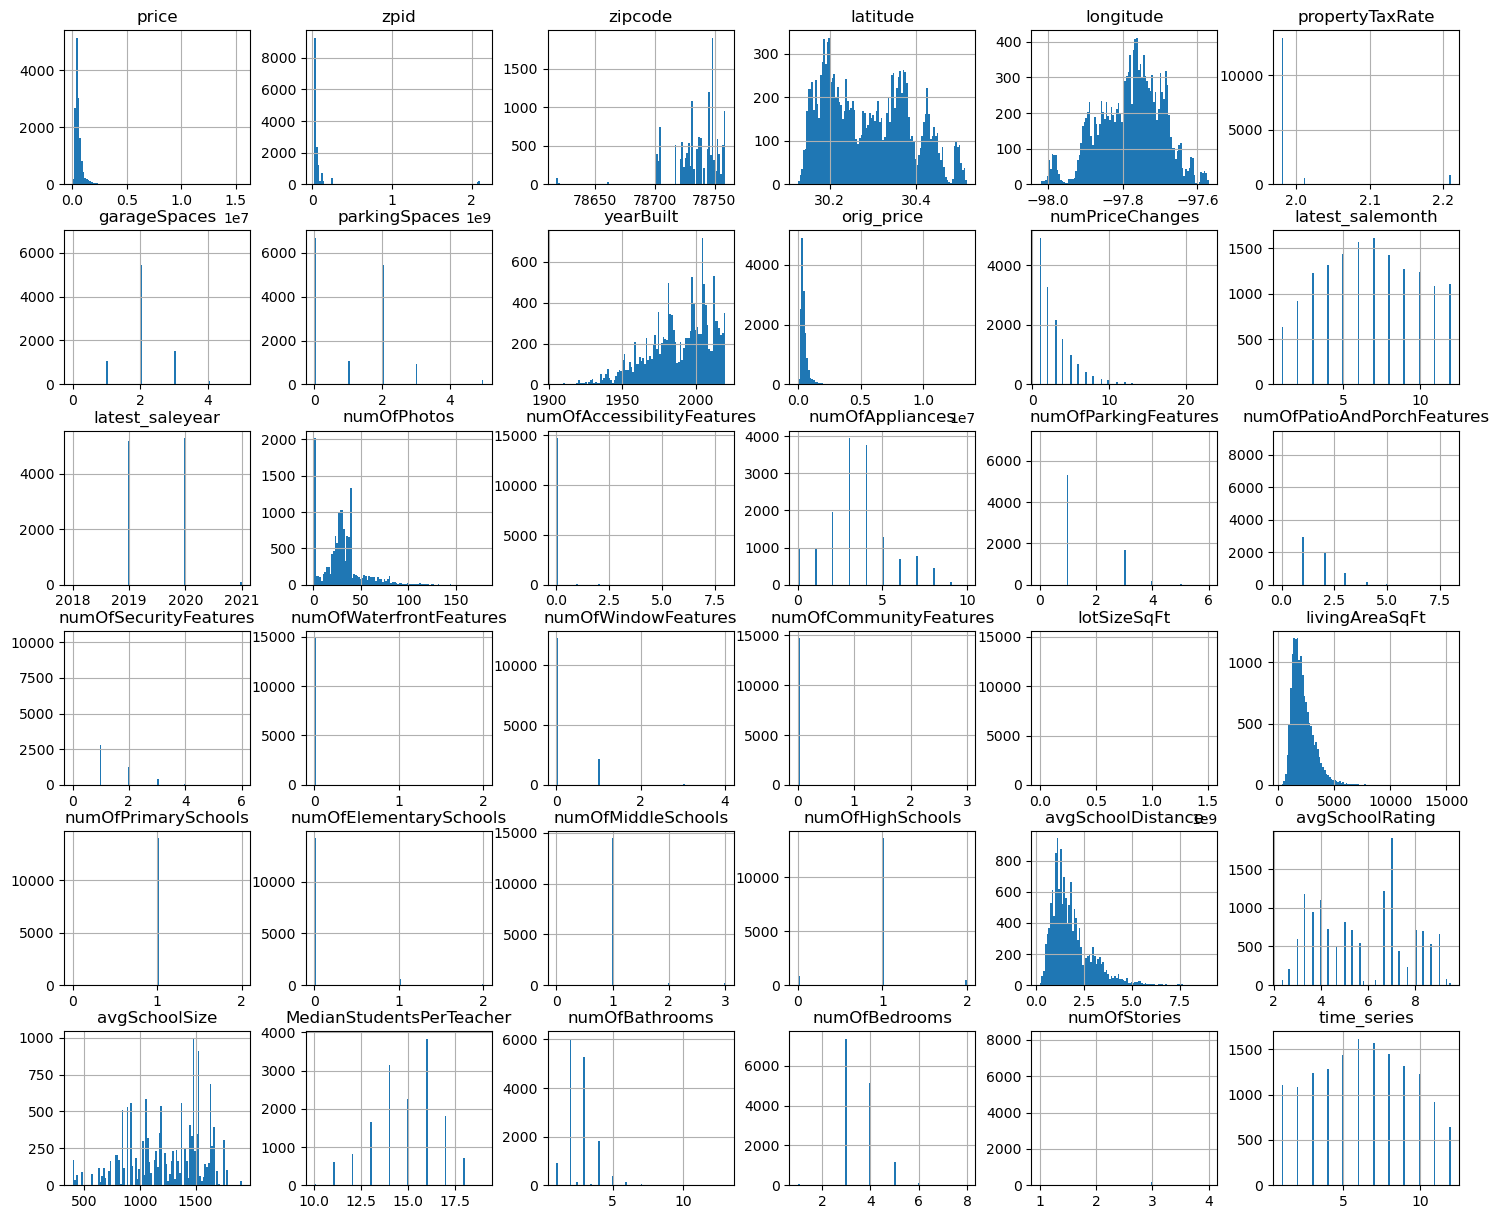

In [113]:
# check how our histograms are looking for our columns that seem to have outliers

df.hist(figsize=(18,15), bins=100);

Para las variables de pies cuadrados, finalmente concluí que las casas y lotes extremadamente grandes están tan subrepresentados en el conjunto de datos que de todos modos no podremos predecir de manera confiable sobre ellos y es mejor dejarlos de lado.

En última instancia, opto por eliminar estos elementos mediante IQR.

Para evitar una gran pérdida de datos de esta manera, mantuve el rango IQR de 1,6 en lugar del estándar 1,5.

In [114]:
# A lot of our variables are not normally shaped, so we can't reliably remove outliers via standard deviation.
# We will use IQR to remove our outliers with the following function

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.6"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.6 * iqr)
    upper_range = Q3 + (1.6 * iqr)
    return lower_range,upper_range  

In [115]:
# determing our IQR for price, lot size, sq footage and longitude
lotlower,lotupper = iqr_outliers(df.lotSizeSqFt)
sqftlower, sqftupper = iqr_outliers(df.livingAreaSqFt)

# dropping the things outside of our lower and upper range
df.drop(df[ (df.lotSizeSqFt > lotupper) | (df.lotSizeSqFt < lotlower) ].index , inplace=True)
df.drop(df[ (df.livingAreaSqFt > sqftupper) | (df.livingAreaSqFt < sqftlower) ].index , inplace=True)

In [116]:
# We'll imputing the median lot size into condo and townhouse listings that are over-listed for lot size square feet

df.loc[(df['homeType']=='Condo') | (df['homeType']=='Townhouse') & (df['livingAreaSqFt']<1200) & (df['lotSizeSqFt']>8000), 'lotSizeSqFt'] = df['lotSizeSqFt'].median()

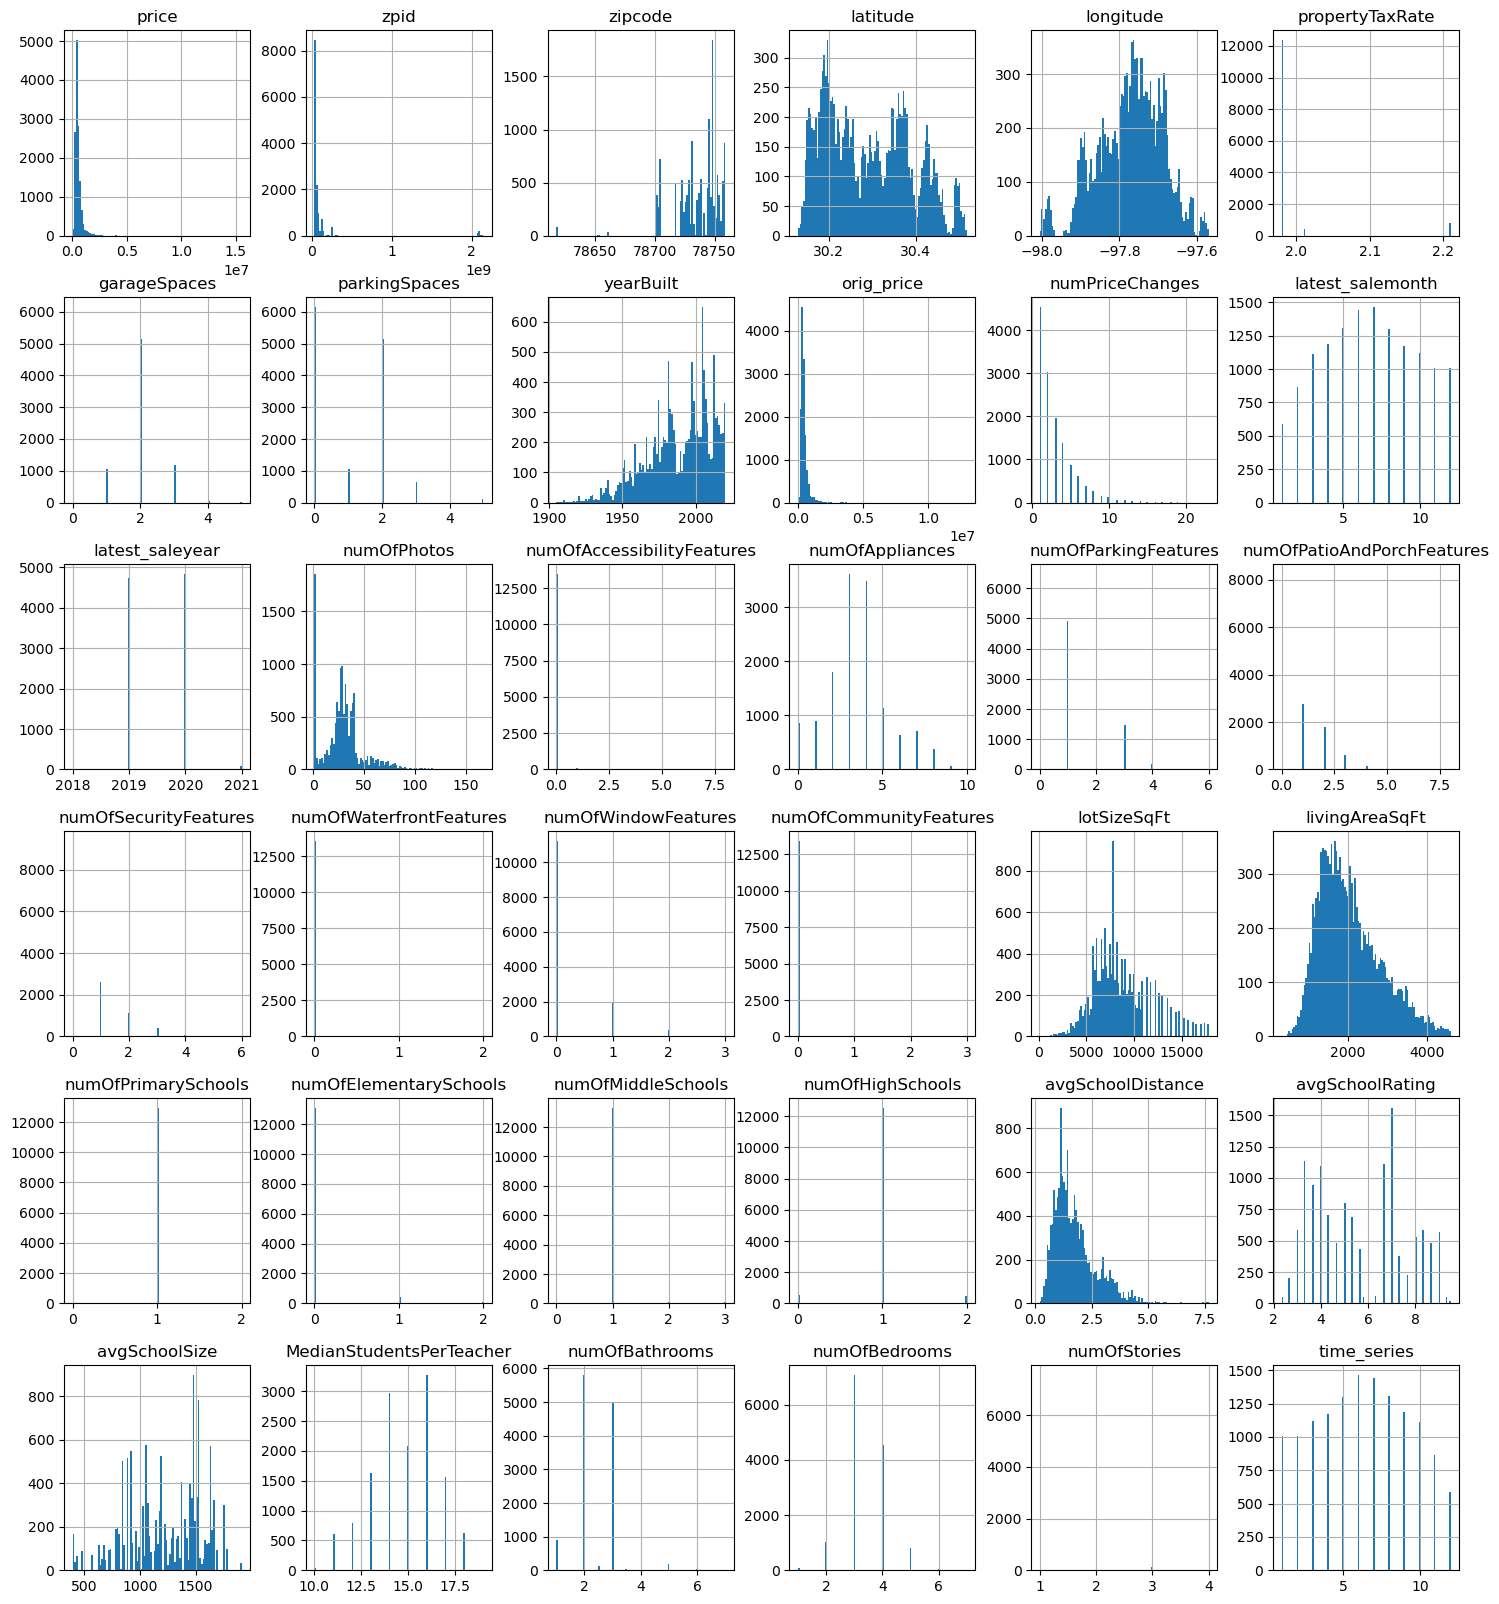

In [117]:
# check how our histograms are looking

df.hist(figsize=(18,20), bins=100);

# much better

In [118]:
# we're using the median house value for a zip code to determine the zip code's sort, so we can visualize the zip code

# group our dataframe by zipcode on median home price, sorted ascending. 
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

# apply the median home price per zip code to the data frame
df['median_zip'] = df['zipcode'].apply(lambda x: round(df.loc[df['zipcode']==x]['price'].median(), 0))

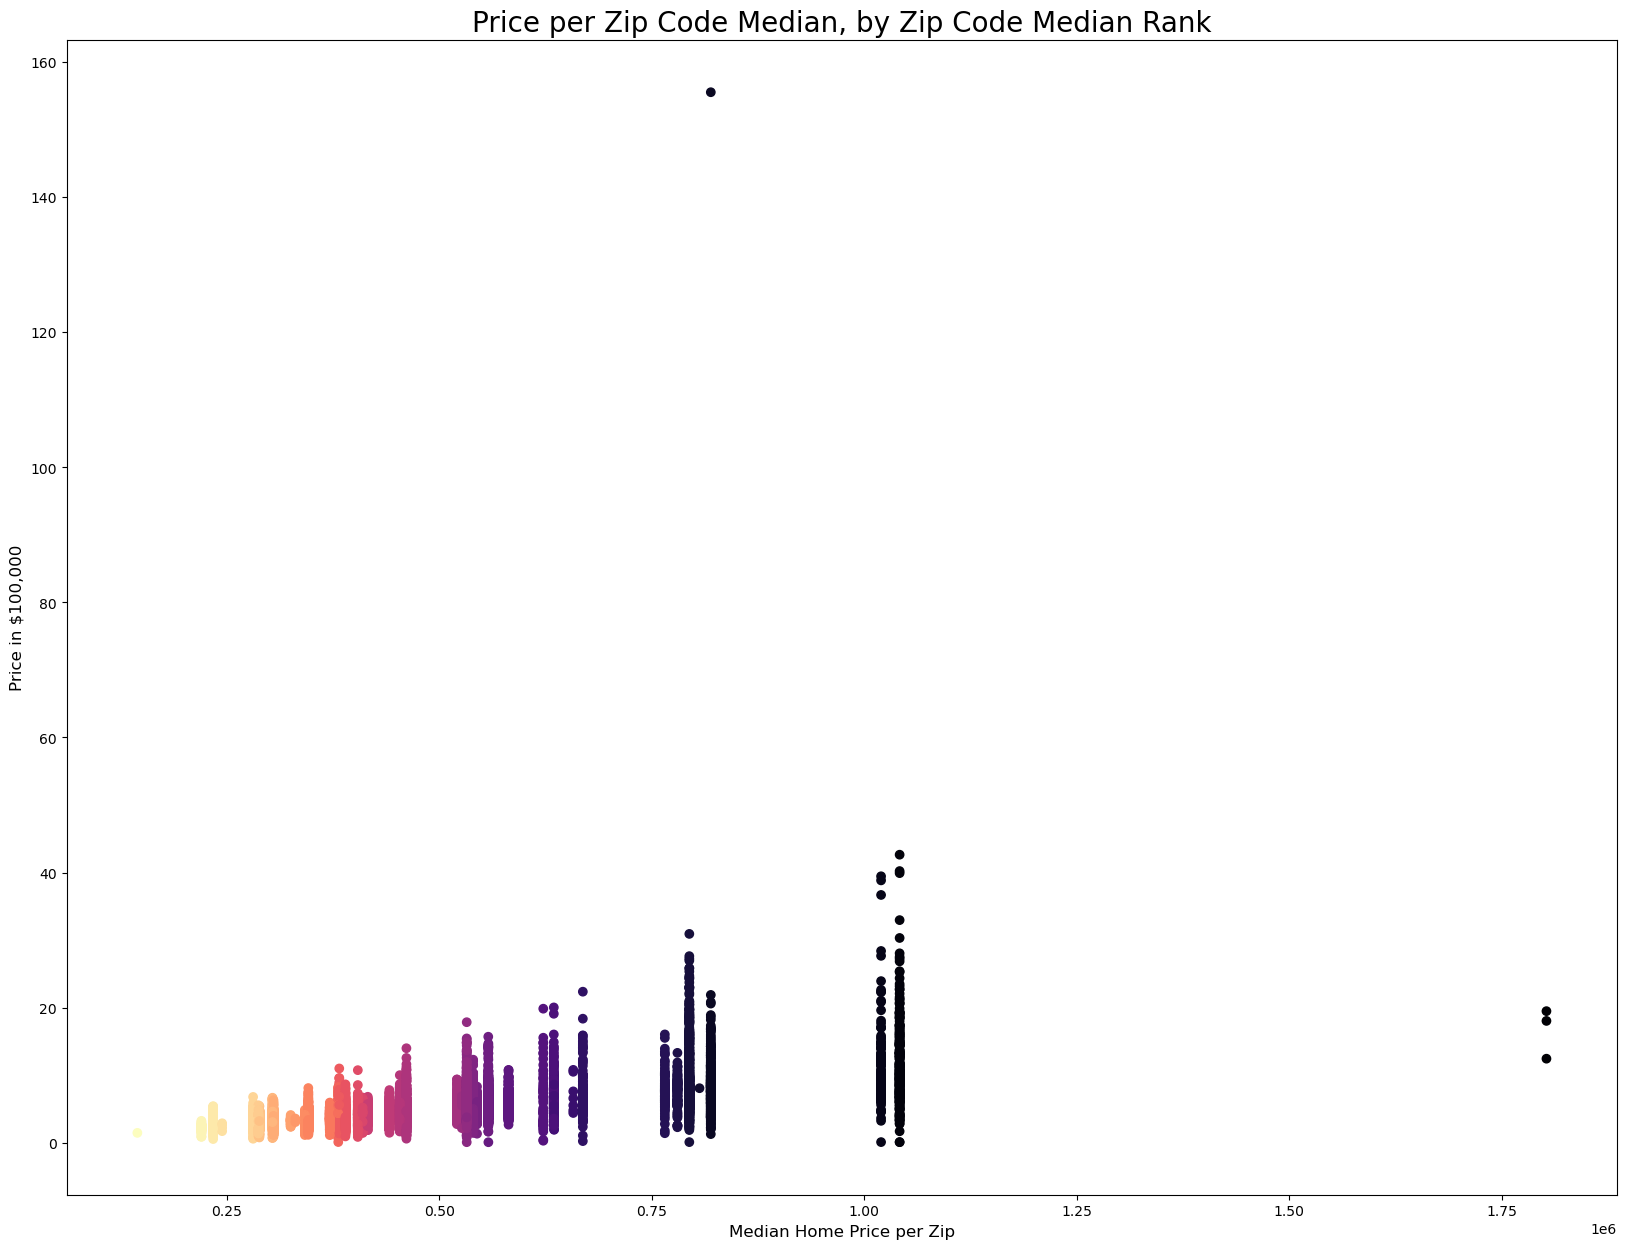

In [119]:
# visualize zip code as a color function

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['median_zip'], df['price'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Median Home Price per Zip', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Zip Code Median, by Zip Code Median Rank', fontsize=20);

Podemos ver que algunos de nuestros códigos postales tienen un valor muy alto. También hay algunos valores atípicos claros en este conjunto de datos. Nos encargaremos de eliminarlos y luego volveremos a esta imagen más tarde, después de haber realizado un poco de limpieza.

Text(0.5, 1.0, 'Price per Total Square Feet, by Zip Code Median Rank')

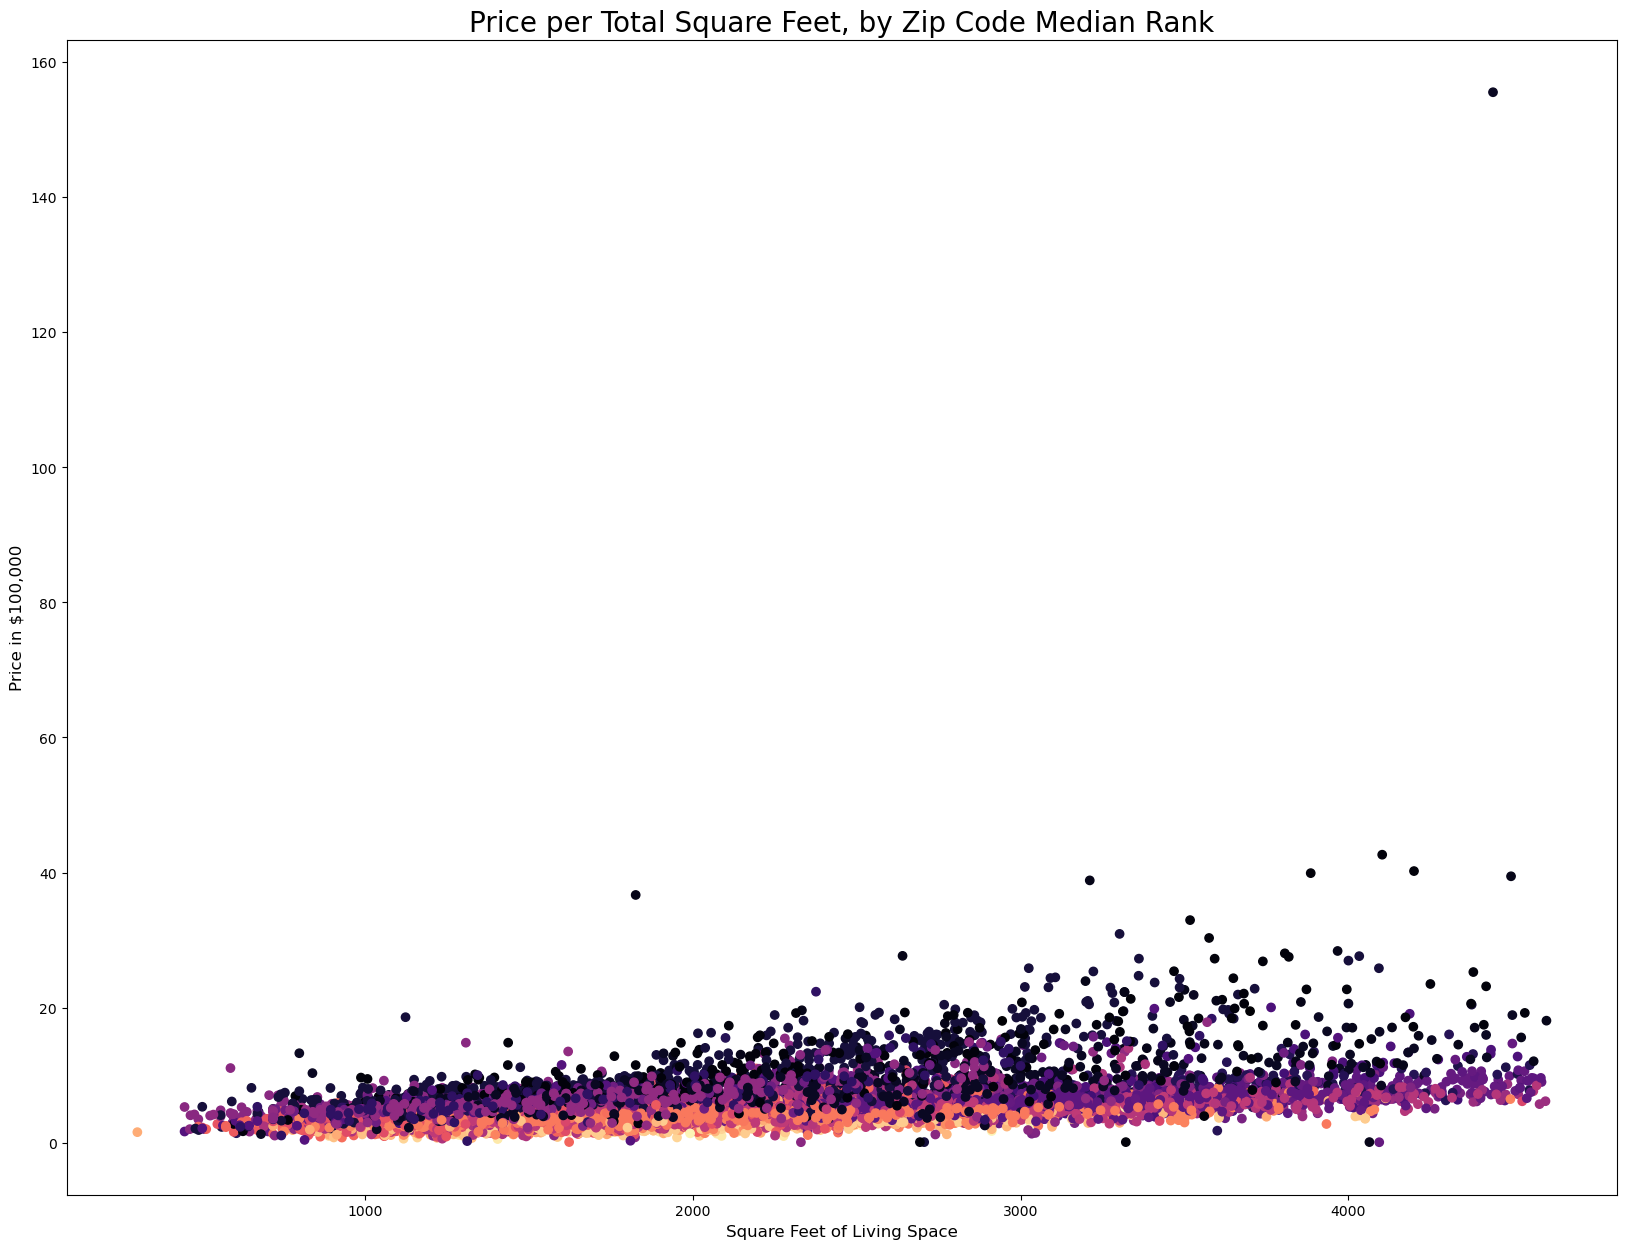

In [120]:
# visualize zip code as a color function, on a plot of price per square footage

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['livingAreaSqFt'], df['price'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Feet, by Zip Code Median Rank', fontsize=20)

In [121]:
# we're dropping the values above 3 million, and the 3 entries from zipcode 78734
df.drop(df[df['price']>3000000].index, inplace=True)
df.drop(df[df['zipcode']==78734].index, inplace=True)

# check price stats by zip code and displaying top 30 zip codes by mean
find_zip_outliers = df.groupby('zipcode')['price'].describe()
find_zip_outliers.sort_values('mean', ascending=False).head(35)
# very suspicious values in many zip codes for min

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
78703,262.0,1.131643e+06,534468.432885,7666.0,744354.25,1028931.0,1452630.25,2803681.0
78746,114.0,1.115630e+06,491398.252409,8027.0,807784.75,1003793.5,1316520.25,2838458.0
78704,666.0,9.273607e+05,480752.220309,7741.0,598974.75,794092.0,1132878.75,2761945.0
78731,420.0,8.348040e+05,335816.364393,126382.0,617115.50,817683.5,984791.50,2187517.0
78738,1.0,8.060850e+05,NaN,806085.0,806085.00,806085.0,806085.00,806085.0
78730,106.0,7.891463e+05,253355.681670,139416.0,627736.50,765292.0,920347.25,1602650.0
78756,133.0,7.604781e+05,363554.170002,22745.0,511784.00,668810.0,963823.00,2235383.0
78733,114.0,7.500451e+05,211673.142505,228079.0,613901.75,780109.0,887561.75,1329652.0
78701,7.0,7.159867e+05,260604.517143,439037.0,514681.50,657534.0,904084.50,1077804.0


In [122]:
# anything under 75k is no way a legitimate market value sale. 
# anything in this range is certainly a inter-family sale,
# non-commercial, some weird sale type.
# We are dropping all of those. 
df.drop(df.loc[(df['price'] <= 75000)].index, axis=0, inplace=True)